# Teil 12 Vernetzen von Programmen

## Vernetzen von Programmen

**import socket**

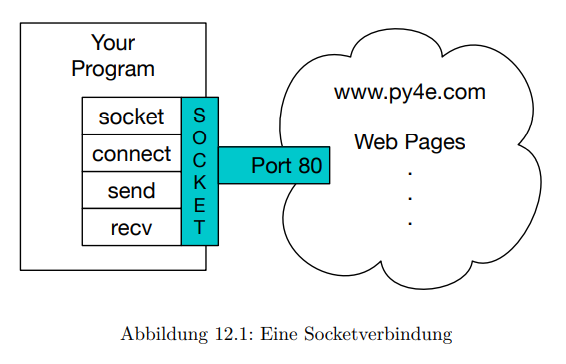

## Abrufen eines Textes über HTTP

In [1]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))                                  # Verbindung herstellen zum Server # connect
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)                                                       # Anfrage der Seite                # send

while True:                                                            # solange daten empangen bis keine mehr kommen
    data = mysock.recv(512)                                                                               # recv
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()                                                          # Verbindung beenden              # close

HTTP/1.1 200 OK
Date: Sun, 22 Jan 2023 13:45:08 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


Eine der Voraussetzungen für die Verwendung des HTTP-Protokolls ist die Notwendigkeit, Daten als **Byte-Objekte** anstelle von Strings zu senden und zu empfangen.<br>
Im vorangegangenen Beispiel wandeln die **Methoden encode() und decode()** Strings in Byte-Objekte und wieder zurück.<br>
Das nächste Beispiel verwendet die Notation **b''**, um anzugeben, dass eine Variable als Byte-Objekt gespeichert werden soll; encode() und b'' sind gleichwertig.

In [2]:
print('Nur String')
print(b'Michael Talarczyk')
print('Michael Talarczyk'.encode())

Nur String
b'Michael Talarczyk'
b'Michael Talarczyk'


## Abrufen eines Bildes über HTTP

In [3]:
import socket
import time

HOST = 'data.pr4e.org'
PORT = 80
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect((HOST, PORT))
mysock.sendall(
    b'GET http://data.pr4e.org/cover3.jpg HTTP/1.0\r\n\r\n')
count = 0
picture = b""

while True:
    data = mysock.recv(5120)
    if len(data) < 1: break
    #time.sleep(0.25)
    count = count + len(data)
    # print(len(data), count)
    picture = picture + data

mysock.close()

# Look for the end of the header (2 CRLF)
pos = picture.find(b"\r\n\r\n")
print('Header length', pos)
print(picture[:pos].decode())

# Skip past the header and save the picture data
picture = picture[pos+4:]
fhand = open("stuff.jpg", "wb")
fhand.write(picture)
fhand.close()

Header length 394
HTTP/1.1 200 OK
Date: Sun, 22 Jan 2023 13:45:08 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Mon, 15 May 2017 12:27:40 GMT
ETag: "38342-54f8f2e5b6277"
Accept-Ranges: bytes
Content-Length: 230210
Vary: Accept-Encoding
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: image/jpeg


## import urllib.request Text
urllib-Code entfernt die Kopfzeilen und gibt nur die Daten an uns zurück

In [4]:
import urllib.request

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')            # urlopen
for line in fhand:
    print(line.decode().strip())

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


## Lesen von Binärdateien mit urllib


In [5]:
import urllib.request, urllib.parse, urllib.error

img = urllib.request.urlopen('http://data.pr4e.org/cover3.jpg').read()         # read

# Datei erzeugen 

fhand = open('cover3.jpg', 'wb')
fhand.write(img)
fhand.close()

In [6]:
# https://talarczyk.de/Michael/lego/315/Taxi-315-3-Render.jpg

import urllib.request, urllib.parse, urllib.error

# https Aufruf

img = urllib.request.urlopen('https://talarczyk.de/Michael/lego/315/Taxi-315-3-Render.jpg').read()         # read

# Datei erzeugen 

fhand = open('Taxi.jpg', 'wb')
fhand.write(img)
fhand.close()

## Parsen von HTML mit regulären Ausdrücken
## und https

**Search for link values within URL input<br>**
import urllib.request, urllib.parse, urllib.error<br>
import re<br>
import ssl<br>

In [7]:
# Search for link values within URL input
import urllib.request, urllib.parse, urllib.error
import re
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# https://talarczyk.de/Michael/lego/Layout.shtml

url = input('Enter Url: ')
html = urllib.request.urlopen(url, context=ctx).read()
links = re.findall(b'href="(http[s]?://.*?)"', html)                # Sucht nach links mit http[s]
for link in links:
    print(link.decode())
    
# Beispiel: https://docs.python.org/3/

Enter Url: https://docs.python.org/3/
https://docs.python.org/3/index.html
https://www.python.org/
https://docs.python.org/3.12/
https://docs.python.org/3.11/
https://docs.python.org/3.10/
https://docs.python.org/3.9/
https://docs.python.org/3.8/
https://docs.python.org/3.7/
https://docs.python.org/3.6/
https://docs.python.org/3.5/
https://docs.python.org/2.7/
https://www.python.org/doc/versions/
https://www.python.org/dev/peps/
https://wiki.python.org/moin/BeginnersGuide
https://wiki.python.org/moin/PythonBooks
https://www.python.org/doc/av/
https://devguide.python.org/
https://www.python.org/
https://devguide.python.org/docquality/#helping-with-documentation
https://docs.python.org/3.12/
https://docs.python.org/3.11/
https://docs.python.org/3.10/
https://docs.python.org/3.9/
https://docs.python.org/3.8/
https://docs.python.org/3.7/
https://docs.python.org/3.6/
https://docs.python.org/3.5/
https://docs.python.org/2.7/
https://www.python.org/doc/versions/
https://www.python.org/dev/pep

In [10]:
# Search for link values within URL input
import urllib.request, urllib.parse, urllib.error
import re
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter Url: ')
html = urllib.request.urlopen(url, context=ctx).read()
links = re.findall(b'<a\shref="(.*)">', html)                # Sucht nach Anker mit href
for link in links:
    print(link.decode())
    
# Beispiel: https://talarczyk.de/Michael/lego/Layout.shtml

Enter Url: https://talarczyk.de/Michael/lego/Layout.shtml
/index.shtml
/Berni/Layout.shtml
/Franz/Layout.shtml
/Eva/Layout.shtml
/Michael/Layout.shtml
/Jutta/Layout.shtml
/Annika-Ines/Layout.shtml
/Martin/Layout.shtml
/Hannes/Layout.shtml
/Vorlage/Layout.shtml
mailto:%20webmaster@talarczyk.de
/index.shtml
https://brickset.com/sets/ownedby-mita
315/Layout.shtml
801-1/Layout.shtml
603-3/Layout.shtml
604-2/Layout.shtml
374-2/Layout.shtml
355-1/Layout.shtml
650/Layout.shtml
358-1/Layout.shtml
602/Layout.shtml
6681/Layout.shtml
3740/Layout.shtml
Vorlage/Layout.shtml
https://www.facebook.com/michael.talarczyk.65"><img style="border: 0px solid ; width: 50px; height: 50px;" alt="f" src="/images/facebook.png
https://twitter.com/DeTalarczyk"><img style="border: 0px solid ; width: 50px; height: 50px;" alt="t" src="/images/twitter.png
https://plus.google.com/103899277728216462483"><img style="border: 0px solid ; width: 50px; height: 50px;" alt="g" src="/images/google-plus.png
https://www.youtube.c

## Parsen von HTML mit BeautifulSoup

Das Programm fragt nach einer Webadresse, öffnet dann die Webseite, liest die Daten ein und **übergibt die Daten an den BeautifulSoup-Parser**, der dann alle **Anker-Tags** abruft und das **href-Attribut** für jedes Tag ausgibt.

In [9]:
# To run this, download the BeautifulSoup zip file
# http://www.py4e.com/code3/bs4.zip
# and unzip it in the same directory as this file

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# fragt nach einer Webadresse
url = input('Enter Url: ')
html = urllib.request.urlopen(url, context=ctx).read()

# übergibt die Daten an den BeautifulSoup-Parser
soup = BeautifulSoup(html, 'html.parser')
# print(soup)

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))
    
# Test: https://talarczyk.de/Michael/lego/Layout.shtml

Enter Url: https://talarczyk.de/Michael/lego/Layout.shtml
/index.shtml
/Berni/Layout.shtml
/Eva/Layout.shtml
/Michael/Layout.shtml
/Vorlage/Layout.shtml
mailto:%20webmaster@talarczyk.de
/Impressum-Disclaimer/Layout.shtml
/dsgvo/Layout.shtml
https://brickset.com/sets/ownedby-mita
315/Layout.shtml
801-1/Layout.shtml
603-3/Layout.shtml
604-2/Layout.shtml
374-2/Layout.shtml
355-1/Layout.shtml
650/Layout.shtml
358-1/Layout.shtml
602/Layout.shtml
6681/Layout.shtml
3740/Layout.shtml
Vorlage/Layout.shtml
https://www.facebook.com/michael.talarczyk.65
https://twitter.com/DeTalarczyk
https://plus.google.com/103899277728216462483
https://www.youtube.com/user/mita7165
mailto:Michael@talarczyk.de
